# Clustering

In [12]:
import pandas as pd 
import matplotlib.pyplot as plt 
# pembe uyarıları göstermez
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel("cars.xls")

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
from sklearn.cluster import KMeans

In [5]:
from sklearn.metrics import silhouette_score

In [6]:
x=df[['Price','Mileage','Cylinder']]

In [7]:
x.head()

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6


In [48]:
model=KMeans(4) 
# burada verdiğimiz sayı kaç gruba ayırmak istediğimizi söylüyor

In [49]:
model=model.fit(x)

In [50]:
tahmin=model.predict(x)

In [51]:
tahmin # 4 farklı gruba ayırmış 

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 1, 3, 1,
       1, 3, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3,
       0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,

In [52]:
x['Cluster']=tahmin

In [53]:
x.head()

,Price,Mileage,Cylinder,Cluster
0,17314.103129,8221,6,2
1,17542.036083,9135,6,2
2,16218.847862,13196,6,2
3,16336.913140,16342,6,2
4,16339.170324,19832,6,1


In [54]:
silhouette_score(x,tahmin)
#bununla kaç gruba ayırmanın en optimum değer olduğunu buluyoruz

0.41328609838381997

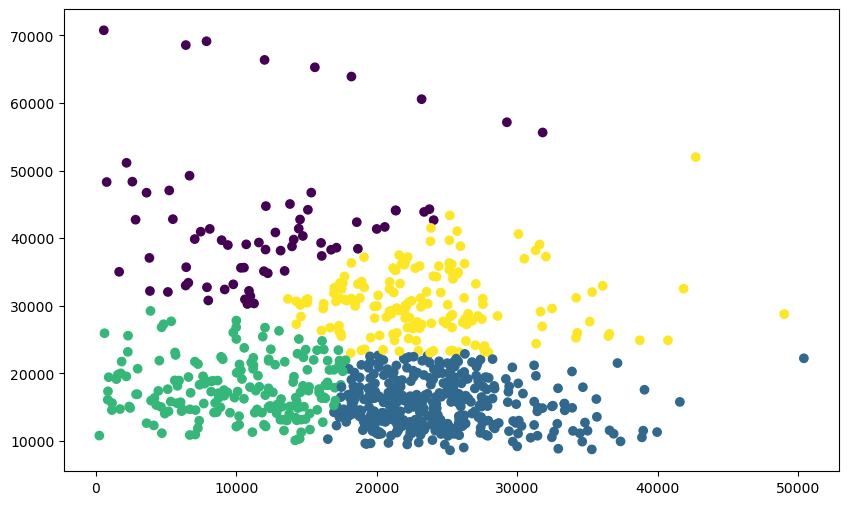

In [55]:
plt.figure(figsize=(10,6))
plt.scatter(x.Mileage,x.Price,c=tahmin);
# optimum 4 olduğunu nereden bileceğiz bunu kontrol etmek için kod yazıcaz şimdi

In [56]:
# en optimum grup sayısını nasıl bulucaz

In [57]:
allscore=[]
allcluster=[]
distances=[]
def clust(kactane):
    for i in range(1,kactane):
        i=i+1
        model=KMeans(i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        distance=model.inertia_
        print('Cluster ',i," score: ", score)
        allscore.append(score)
        allcluster.append(i)
        distances.append(distance)

In [58]:
clust(10)

Cluster  2  score:  0.4517011895946132
Cluster  3  score:  0.4132108635490875
Cluster  4  score:  0.41328609838381997
Cluster  5  score:  0.3552591948782001
Cluster  6  score:  0.37336340407754715
Cluster  7  score:  0.3588288793909365
Cluster  8  score:  0.34017691964475877
Cluster  9  score:  0.349578667265076
Cluster  10  score:  0.35499358700520484


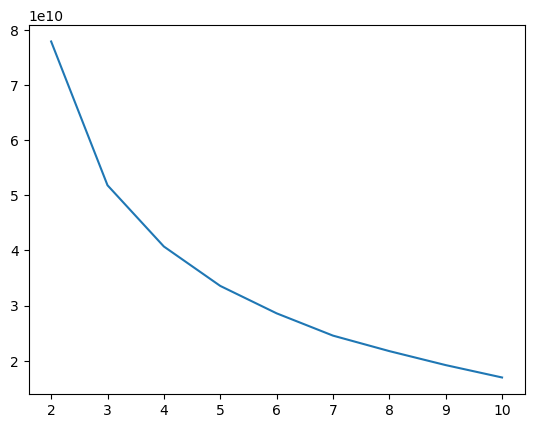

In [59]:
plt.plot(allcluster,distances)
#Elbow method

In [61]:
# farklı bir kümelenme modeli 

# Hierarchical Clustering

In [62]:
from scipy.cluster.hierarchy import dendrogram ,linkage

In [63]:
link_data=linkage(x,method='ward',metric='euclidean')

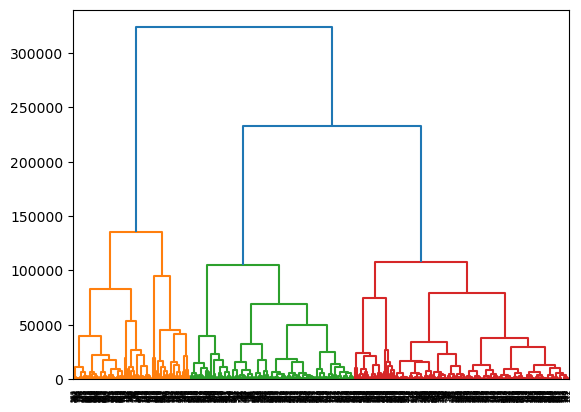

In [66]:
dendrogram(link_data)
plt.show()

In [67]:
 from sklearn.cluster import DBSCAN

In [74]:
clusters=DBSCAN(eps=2.5,min_samples=4).fit(x)

In [75]:
set(clusters.labels_)

{-1}